<a href="https://colab.research.google.com/github/Sandymyatnoe/Sandymyatnoe/blob/main/ISLP_ch3_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
import statsmodels.api as sm

In [36]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [37]:
!pip install ISLP

In [38]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [39]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [40]:
predictors=Boston.drop('crim', axis=1).columns
predictors

Index(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [41]:
results=[]

for predictor in predictors:
  X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  predictor: Boston[predictor]})
  y = Boston['crim']
  model = sm.OLS(y, X)
  result = model.fit()
  results.append(result)




In [42]:
for i in results:
  print(i.summary())


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           5.51e-06
Time:                        11:50:13   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.4537      0.417     10.675      0.0

In [43]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

<ipython-input-44-37a5cf96bb8c>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.params[0],
<ipython-input-44-37a5cf96bb8c>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.params[1],
<ipython-input-44-37a5cf96bb8c>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.params[0],
<ipython-input-44-37a5cf96bb8c>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer

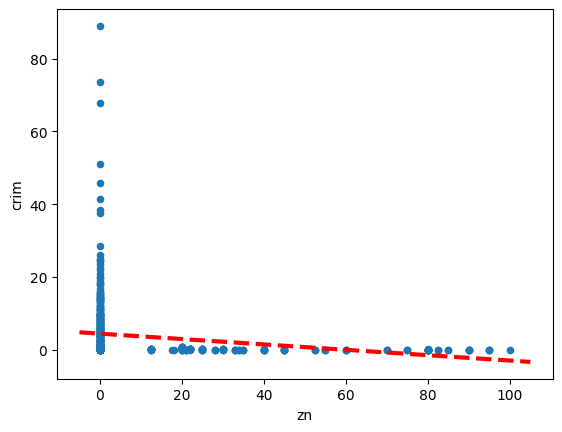

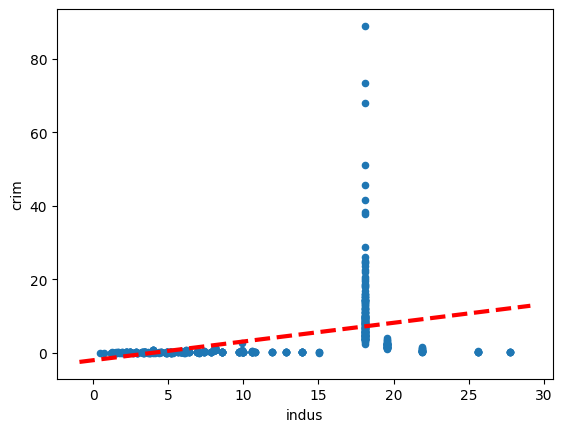

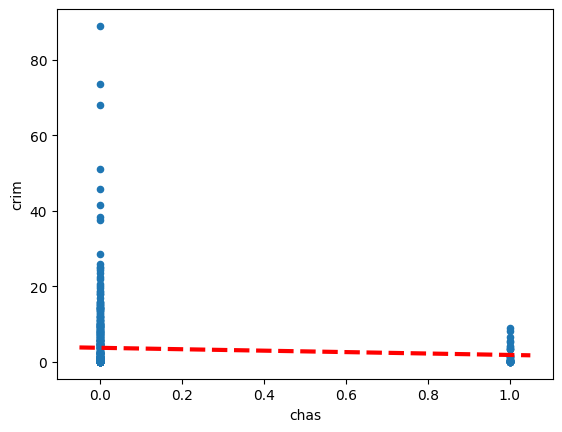

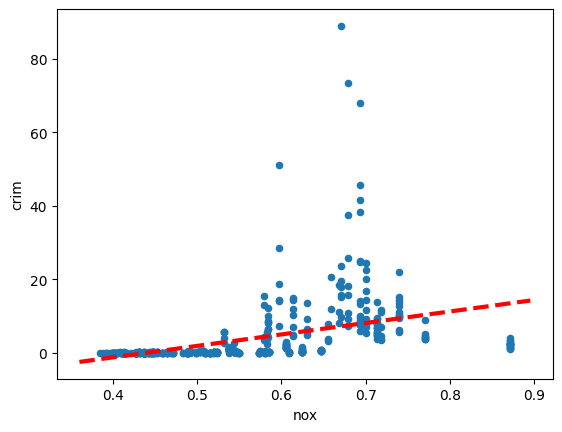

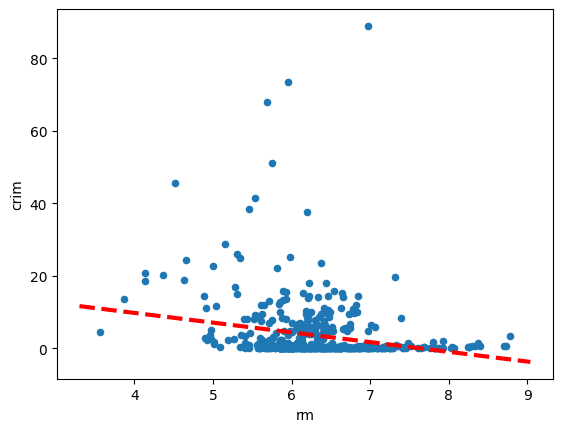

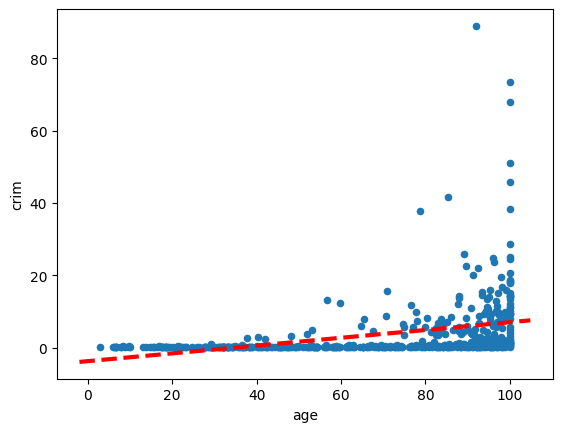

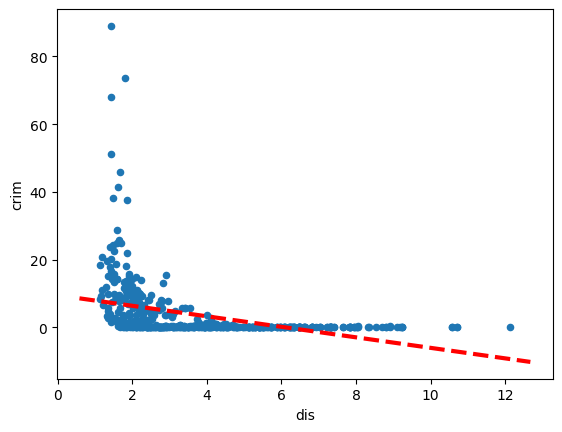

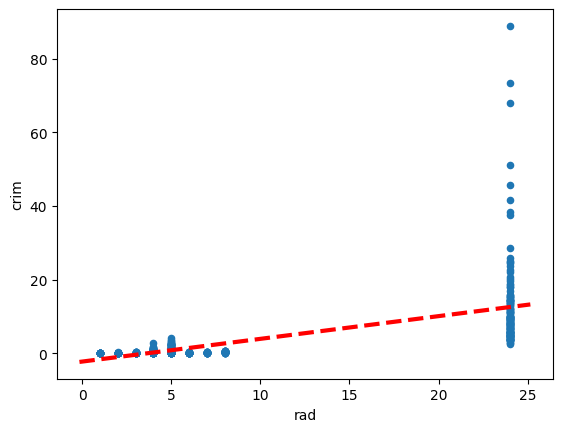

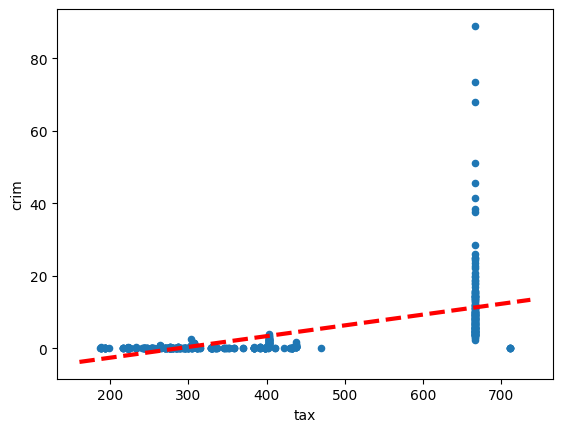

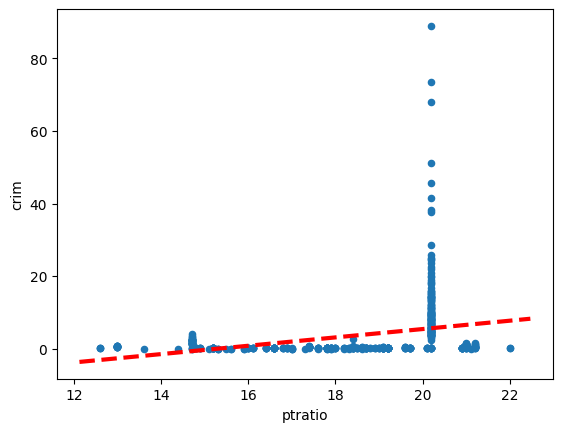

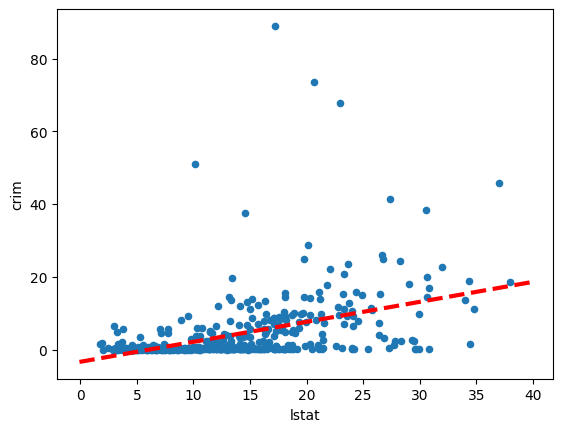

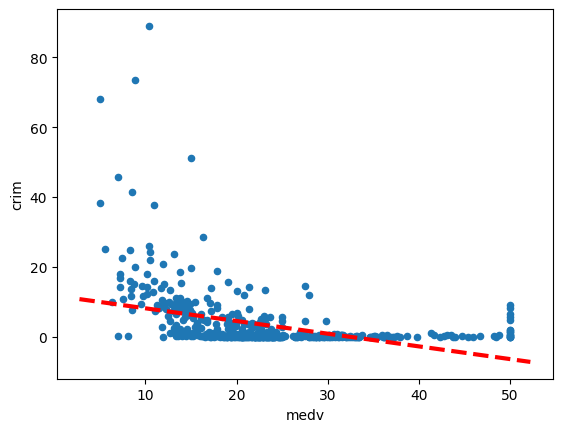

In [44]:
for predictor,result in zip(predictors,results):

  ax = Boston.plot.scatter(predictor, 'crim')
  result
  abline(ax,
       result.params[0],
       result.params[1],
       'r--',
       linewidth=3)


In [45]:
X = MS(predictors).fit_transform(Boston)
model = sm.OLS(y, X)
results2 = model.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


In [50]:
univariate=[]
for i in range(0,12):
  a=results[i].params[1]
  univariate.append(a)
univariate

<ipython-input-50-a2b88f4478dc>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a=results[i].params[1]


[-0.07393497740412348,
 0.5097763311042313,
 -1.8927765508037608,
 31.248531201122923,
 -2.684051224113948,
 0.10778622713953308,
 -1.5509016824100994,
 0.6179109273272014,
 0.029742252822765353,
 1.1519827870705868,
 0.5488047820623981,
 -0.363159922257603]

In [54]:
multivariate=list(results2.params.loc[predictors])
multivariate

[0.04571003863975472,
 -0.05835011066598057,
 -0.8253775522409904,
 -9.957586547089262,
 0.6289106621781884,
 -0.0008482790661889846,
 -1.0122467382083966,
 0.6124653114968011,
 -0.0037756465234427897,
 -0.3040727572312349,
 0.13880059677676138,
 -0.22005635903920745]

In [57]:
comparison=pd.DataFrame({'index':predictors,'univariate':univariate,'multivariate':multivariate})
comparison

,index,univariate,multivariate
0,zn,-0.073935,0.045710
1,indus,0.509776,-0.058350
2,chas,-1.892777,-0.825378
3,nox,31.248531,-9.957587
4,rm,-2.684051,0.628911
5,age,0.107786,-0.000848
6,dis,-1.550902,-1.012247
7,rad,0.617911,0.612465
8,tax,0.029742,-0.003776
9,ptratio,1.151983,-0.304073


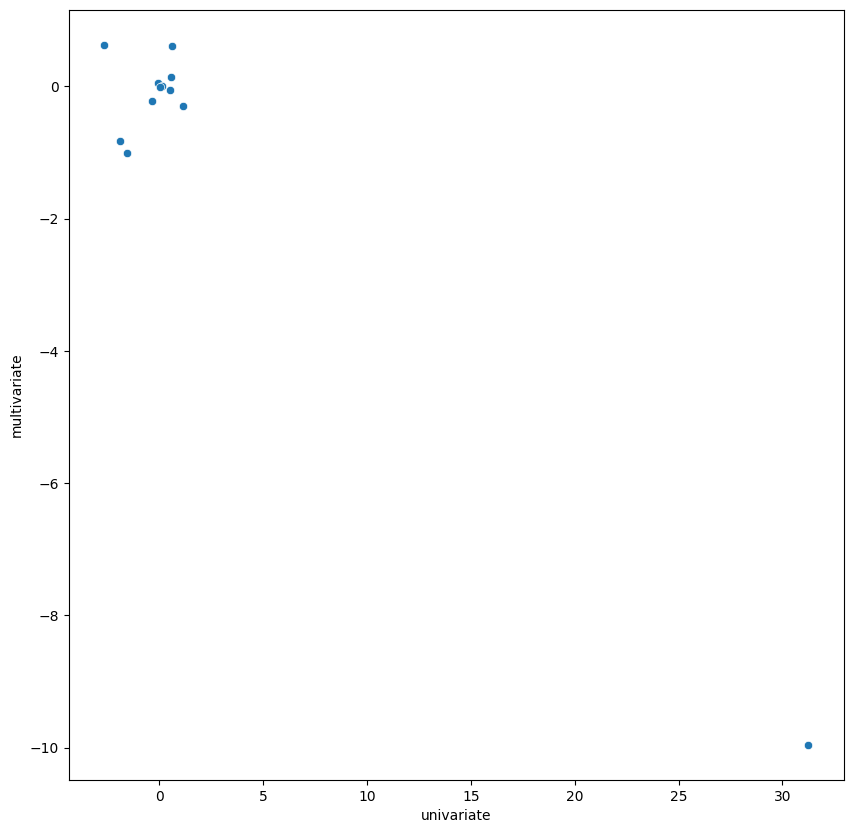

In [70]:
import seaborn as sns

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='univariate', y='multivariate', data=comparison);


In [81]:
poly_results=[]

for predictor in predictors:
  X = MS([poly(predictor, degree=3)]).fit_transform(Boston)
  y = Boston['crim']
  model = sm.OLS(y, X)
  result3 = model.fit().pvalues[0:4]
  poly_results.append(result3)



In [83]:
for i in range(0,12):
  print(poly_results[i])

intercept                1.547150e-20
poly(zn, degree=3)[0]    4.697806e-06
poly(zn, degree=3)[1]    4.420507e-03
poly(zn, degree=3)[2]    2.295386e-01
dtype: float64
intercept                   3.606468e-25
poly(indus, degree=3)[0]    8.854243e-24
poly(indus, degree=3)[1]    1.086057e-03
poly(indus, degree=3)[2]    1.196405e-12
dtype: float64
intercept                  8.047945e-20
poly(chas, degree=3)[0]    7.506753e-02
poly(chas, degree=3)[1]    1.410877e-02
poly(chas, degree=3)[2]    2.625413e-01
dtype: float64
intercept                 2.742908e-26
poly(nox, degree=3)[0]    2.457491e-26
poly(nox, degree=3)[1]    7.736755e-05
poly(nox, degree=3)[2]    6.961110e-16
dtype: float64
intercept                1.026665e-20
poly(rm, degree=3)[0]    5.128048e-07
poly(rm, degree=3)[1]    1.508545e-03
poly(rm, degree=3)[2]    5.085751e-01
dtype: float64
intercept                 5.918933e-23
poly(age, degree=3)[0]    4.878803e-17
poly(age, degree=3)[1]    2.291156e-06
poly(age, degree=3)[2]  

In [ ]:
for predictor,result in zip(predictors,poly_results):

  ax = Boston.plot.scatter(predictor, 'crim')
  result
  abline(ax,
       result.params[0],
       result.params[1],
       'r--',
       linewidth=3)